# Showcase of Complete Workflow

In [1]:
''' Common scientific Python libraries '''
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plm
from scipy.cluster.hierarchy import dendrogram

''' Custom scripts '''
import os, sys
sys.path.append(os.path.join(os.getcwd(), "src"))
from clustering import detectClusters, extractClusterCoordinates
from grouping import grouping

## Create and visualize sample lattice

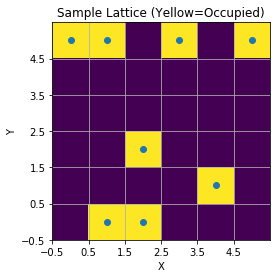

In [2]:
# Initialize the lattice
test_data = np.zeros(shape = (6,6), dtype='int16')
test_data[0, range(1,3)] = 1
test_data[1, 4] = 1
test_data[2, 2] = 1
test_data[5, [0,1,3,5]] = 1

# Visualize
plt.imshow(test_data, origin='lower')
occupied_pts = np.transpose(np.nonzero(test_data))
plt.scatter(occupied_pts[:,1], occupied_pts[:,0])

plt.ylabel("Y"); plt.xlabel("X")
plt.title("Sample Lattice (Yellow=Occupied)")
plt.xticks(np.arange(-0.5,5.5,1))
plt.yticks(np.arange(-0.5,5.5,1))
plt.grid()

## Main workflow

*Given* a lattice configuration, it only takes three lines to extract clustering information from it. The names of the variables should be self-explanatory, and their content allows us to determine various cluster properties. **Area** is one example --- in units of lattice sites.

In [3]:
cutoff = 1.1 # Cut to dendrogram to obtain clusters at desired scale
lattice_params = {"sizeY": 6, "sizeX": 6}

''' Perform hierarchical clustering '''
_, linkage_matrix, HCStats = detectClusters(data=test_data, method='single', dendrogram_cutoff=cutoff)

''' Collate from clustering output the information about *each* cluster '''
cluster_coordinates = extractClusterCoordinates(HCStats, lattice_params)

''' Finally, output lists of cluster ids. Each tuple contains clusters 
that are merged together across periodic boundaries '''
cluster_groups = grouping(cluster_coordinates, lattice_params)
assert (cluster_groups is not None), 'WARNING: cluster_groups == None; likely no clusters detected'

In [4]:
def count_area(cluster_groups, HCStats):
    '''
        Sample function for calculating the 2D area of each cluster
        Return results in *units of lattice sites*
    '''
    area = np.zeros( shape=(len(cluster_groups),) )     
    
    for ix, cluster in enumerate(cluster_groups):
        for cid in cluster:
            area[ix] += np.sum(HCStats[:,-1] == cid)
    return area

In [5]:
areas = count_area(cluster_groups, HCStats)
for cluster,area in zip(cluster_groups, areas):
    print("Cluster {} has area {}".format(cluster, area))

Cluster [0, 2, 3] has area 5.0
Cluster [1] has area 1.0
Cluster [4] has area 1.0
Cluster [5] has area 1.0


Finally, here's visual confirmation for the areas above. The numbers on the lattice identify each cluster. Note that clusters 0, 2, and 3 are are connected across periodic boundaries, and therefore count as 1 cluster.

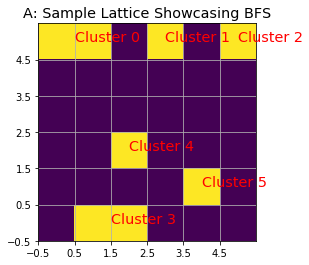

In [6]:
plt.imshow(test_data, origin='lower')
plt.title("A: Sample Lattice Showcasing BFS", fontsize='x-large')
plt.xticks(np.arange(-0.5,5.5,1))
plt.yticks(np.arange(-0.5,5.5,1))
plt.grid()

cluster_ids = HCStats[:,-1]
for cluster in np.unique(cluster_ids):
    X = HCStats[cluster_ids == cluster, 0]
    Y = HCStats[cluster_ids == cluster, 1]
    label_X = np.mean(X); label_Y = np.mean(Y)
    plt.text(x=label_X, y=label_Y, s="Cluster {}".format(cluster), color='red', fontsize='x-large')

plt.savefig("Workflow-Lattice.png")

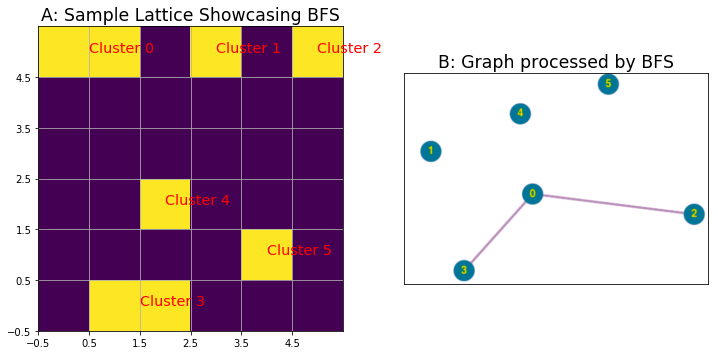

In [7]:
# Draw the whole lattice again
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

axes[0].imshow(test_data, origin='lower')
axes[0].set_title("A: Sample Lattice Showcasing BFS", fontsize='xx-large')
axes[0].set_xticks(np.arange(-0.5,5.5,1))
axes[0].set_yticks(np.arange(-0.5,5.5,1))
axes[0].grid()

# For each cluster, draw ID at the mean coordinates of all observations in the cluster
cluster_ids = HCStats[:,-1]
for cluster in np.unique(cluster_ids):
    X = HCStats[cluster_ids == cluster, 0]
    Y = HCStats[cluster_ids == cluster, 1]
    label_X = np.mean(X); label_Y = np.mean(Y)
    axes[0].text(x=label_X, y=label_Y, s="Cluster {}".format(cluster), color='red', fontsize='x-large')

# For completeness, 
axes[1].imshow(plm.imread("BFS_Graph.png"), interpolation='bilinear')
axes[1].set_xticks([]); axes[1].set_yticks([])
axes[1].set_title("B: Graph processed by BFS", fontsize='xx-large')

fig.savefig("BFS-Sample.png")